In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Q1 Solution

In [128]:
def linear_regression(X_train: np.array, Y_train: pd.DataFrame)->(np.array, np.array):
    X_train_T = np.transpose(X_train)
    w = np.linalg.inv(X_train_T @ X_train) @ X_train_T @ Y_train
    return X_train @ w, w

[2.5] [1.5 0.4] [ 9.  -7.1  1.5] [-5.         15.16666667 -8.5         1.33333333]


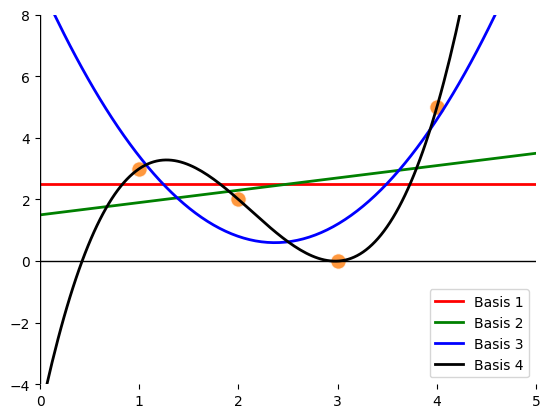

In [129]:
X = [1, 2, 3, 4]
Y = [3, 2, 0, 5]
X = np.array(X).reshape(-1, 1)

basis_1 = X**0
basis_2 = np.hstack([X**0, X])
basis_3 = np.hstack([X**0, X, X**2])
basis_4 = np.hstack([X**0, X, X**2, X**3])
basis = [basis_1, basis_2, basis_3, basis_4]
w_k = []

plot_X = np.linspace(0, 6, 200)
colors = ['red', 'green', 'blue', 'black']
for basis_no in range(1, 5):
    Y_pred, w_basis = linear_regression(basis[basis_no-1], Y)
    error_basis = np.mean((Y_pred-Y)**2)
    w_k.append(w_basis)
    Y_pred_line = np.zeros_like(plot_X)
    for idx, coef in enumerate(w_basis):
        Y_pred_line += coef * plot_X**idx
    plt.plot(plot_X, Y_pred_line, color=colors[basis_no-1], linewidth=2, label=f"Basis {basis_no}")
        

print(w_k[0], w_k[1], w_k[2], w_k[3])

X = X.flatten()
sns.scatterplot(x=X, y=Y, s=125, alpha=0.8, color='#ff7f0e')


plt.xlim(0, 5)
plt.ylim(-4, 8)
sns.despine(left=True, bottom=True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.legend()


## Q2 Solution

error for basis number: 0 is 0.13929246115886443
error for basis number: 1 is 0.02585335168027497
error for basis number: 2 is 0.0046044818659876285
error for basis number: 3 is 0.015071349725933042
error for basis number: 4 is 0.09630824782059637


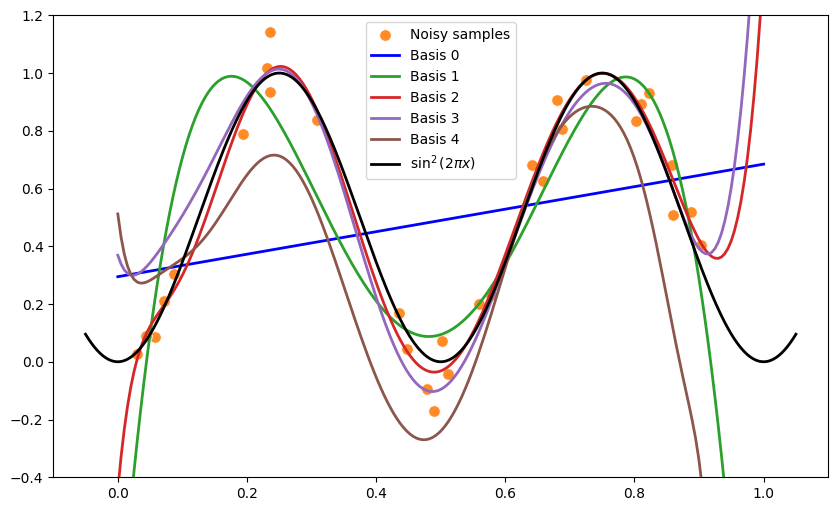

In [130]:
X = np.random.uniform(0, 1, 30)
Y = np.sin(2 * np.pi * X)**2 + np.random.normal(loc=0.0, scale=0.07, size=30)
plt.figure(figsize=(10, 6))  # width=10 inches, height=6 inches

sns.scatterplot(x=X, y=Y, s=70, alpha=0.9, color='#ff7f0e', label='Noisy samples')

X = X.reshape(-1, 1)
basis_2 = np.hstack([X**0, X])
basis_5 = np.hstack([basis_2, X**2, X**3, X**4])
basis_10 = np.hstack([basis_5, X**5, X**6, X**7, X**8, X**9])
basis_14 = np.hstack([basis_10, X**10, X**11, X**12, X**13])
basis_18 = np.hstack([basis_14, X**14, X**15, X**16, X**17])
basis = [basis_2, basis_5, basis_10, basis_14, basis_18]
colors = ['blue', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
plot_X = np.linspace(0, 1, 200)

for basis_no in range(len(basis)):
    Y_pred, w_basis = linear_regression(basis[basis_no], Y)
    error_basis = np.mean((Y_pred-Y)**2)
    print(f"error for basis number: {basis_no} is {error_basis}")
    Y_pred_line = np.zeros_like(plot_X)
    for idx, coef in enumerate(w_basis):
        Y_pred_line += coef*plot_X**idx
    plt.plot(plot_X, Y_pred_line, color=colors[basis_no], linewidth=2, label=f"Basis {basis_no}")

cont_X = np.linspace(-0.05, 1.05, 500)
cont_Y = np.sin(2*np.pi*cont_X)**2
plt.plot(cont_X, cont_Y, color="black", linewidth=2, label=r'$\sin^2(2\pi x)$')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.4, 1.2)

plt.legend()


In [131]:
# scale parameter that gets used to generate the train and test dataset
# the question states that the noise should come from a normal distribution with mean 0 and standard deviation of 0.07
scale=0.07
mean=0.0

# generate training data
train_samples = 30
X_train = np.random.uniform(0, 1, train_samples)
Y_train = np.sin(2 * np.pi * X_train)**2 + np.random.normal(loc=mean, scale=scale, size=train_samples)
X_train = X_train.reshape(-1, 1)

# use the training data to learn the weight vector for each basis
basis = None
train_errors, test_errors, w = [], [], []
for i in range(1, 19):
    basis = X_train**(i-1) if basis is None else np.hstack([basis, X_train**(i-1)])
    Y_pred, weight = linear_regression(basis, Y_train)
    error_basis = np.mean((Y_pred-Y_train)**2)
    w.append(weight)
    train_errors.append(error_basis)

# use the weight vector to make predictions on the test dataset 
basis = None
test_samples=1000
X_test = np.random.uniform(0, 1, test_samples).reshape(-1, 1)
Y_test = np.sin(2 * np.pi * X_test)**2 + np.random.normal(loc=mean, scale=scale, size=test_samples)
for i in range(1, 19):
    basis = X_test**(i-1) if basis is None else np.hstack([basis, X_test**(i-1)])
    Y_test_pred = np.full(X_test.shape, w[i-1]) if i==1 else np.dot(w[i-1], basis.T)
    error_basis = np.mean((Y_test_pred-Y_test)**2)
    test_errors.append(error_basis)

In [132]:
w[0]

array([0.6507209])

In [133]:
# generate the log of train and test error
k = list(range(1, 19, 1))
log_train_error = [float(np.log(error)) for error in train_errors]
log_test_error = [float(np.log(error)) for error in test_errors]


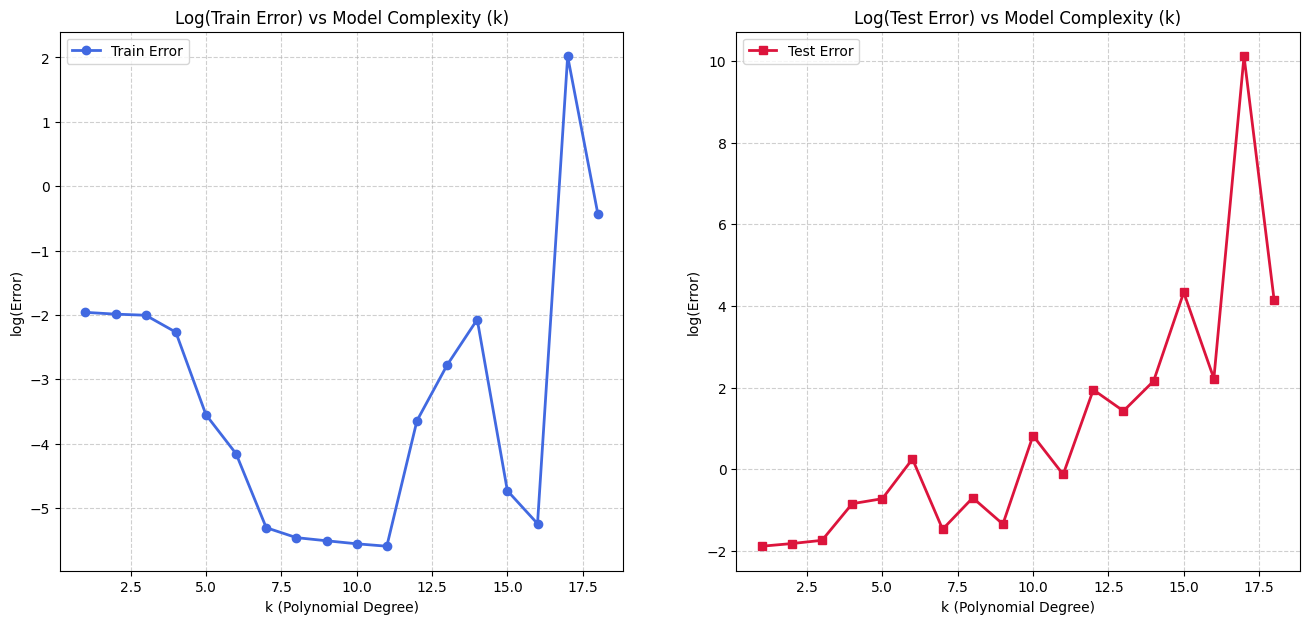

In [134]:
# plot the log of the train and test error

plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(k, log_train_error, marker='o', color='royalblue', linewidth=2, label='Train Error')
plt.title('Log(Train Error) vs Model Complexity (k)')
plt.xlabel('k (Polynomial Degree)')
plt.ylabel('log(Error)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# --- Right plot: Test error ---
plt.subplot(1, 2, 2)
plt.plot(k, log_test_error, marker='s', color='crimson', linewidth=2, label='Test Error')
plt.title('Log(Test Error) vs Model Complexity (k)')
plt.xlabel('k (Polynomial Degree)')
plt.ylabel('log(Error)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

In [135]:
# the train and test curve can be slightly different based on the generated train and test data points
# so we generate the train and test datasets 100 times, repeat the above the experiment on each dataset
# and take the ln(avg(train/test error)) for each dimension across the 100 trials
scale=0.07
mean=0.0
global_test_errors, global_train_errors = [], []

train_samples=30
test_samples=1000
for i in range(100):
    X_train = np.random.uniform(0, 1, train_samples)
    Y_train = np.sin(2 * np.pi * X_train)**2 + np.random.normal(loc=mean, scale=scale, size=train_samples)
    X_train = X_train.reshape(-1, 1)
    
    basis = None
    train_errors, test_errors, w = [], [], []
    for i in range(1, 19):
        basis = X_train**(i-1) if basis is None else np.hstack([basis, X_train**(i-1)])
        Y_pred, w_basis = linear_regression(basis, Y_train)
        error_basis = np.mean((Y_pred-Y_train)**2)
        w.append(w_basis)
        train_errors.append(float(error_basis))
    global_train_errors.append(train_errors)
    
    basis = None
    X_test = np.random.uniform(0, 1, test_samples).reshape(-1, 1)
    Y_test = np.sin(2 * np.pi * X_test)**2 + np.random.normal(loc=mean, scale=scale, size=test_samples)
    for i in range(1, 19):
        basis = X_test**(i-1) if basis is None else np.hstack([basis, X_test**(i-1)])
        Y_test_pred = np.full(X_test.shape, w[i-1]) if basis is None else np.dot(w[i-1], basis.T)
        error_basis = np.mean((Y_test_pred-Y_test)**2)
        test_errors.append(error_basis)
    global_test_errors.append(test_errors)
    

In [136]:
k = list(range(1, 19, 1))
train_mean_errors = np.mean(global_train_errors, axis=0)
test_mean_errors = np.mean(global_test_errors, axis=0)
log_train_mean_errors = [float(np.log(error)) for error in train_mean_errors]
log_test_mean_errors = [float(np.log(error)) for error in test_mean_errors]

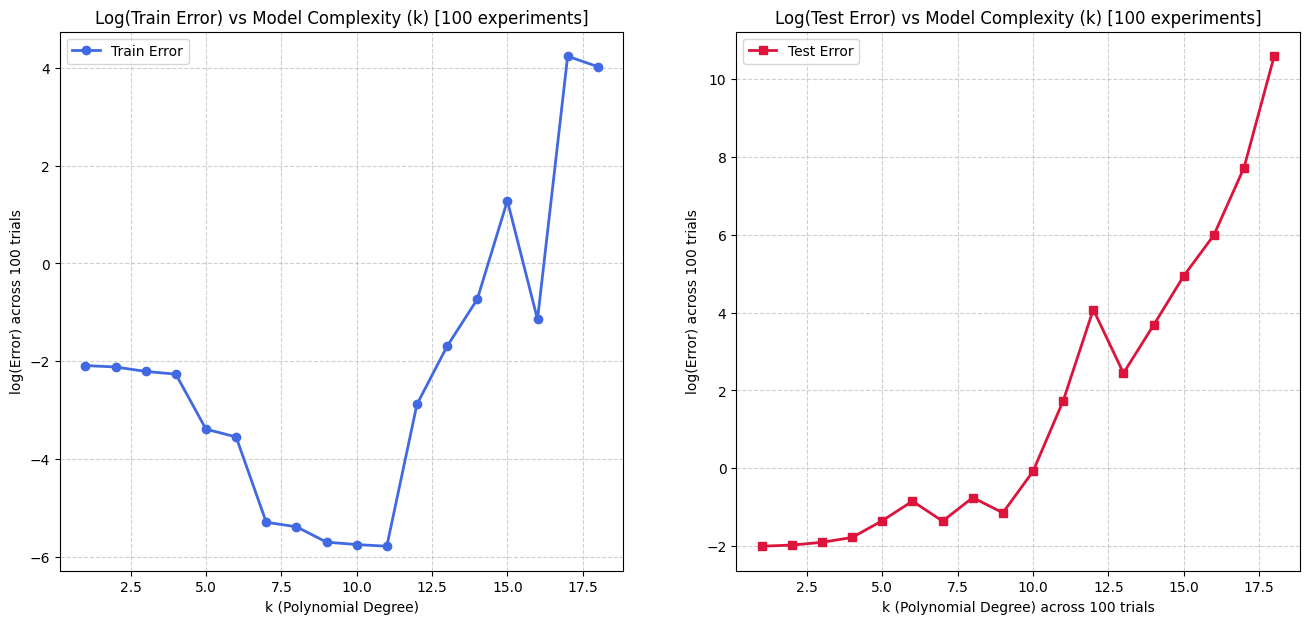

In [137]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(k, log_train_mean_errors, marker='o', color='royalblue', linewidth=2, label='Train Error')
plt.title('Log(Train Error) vs Model Complexity (k) [100 experiments]')
plt.xlabel('k (Polynomial Degree)')
plt.ylabel('log(Error) across 100 trials')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# --- Right plot: Test error ---
plt.subplot(1, 2, 2)
plt.plot(k, log_test_mean_errors, marker='s', color='crimson', linewidth=2, label='Test Error')
plt.title('Log(Test Error) vs Model Complexity (k) [100 experiments]')
plt.xlabel('k (Polynomial Degree) across 100 trials')
plt.ylabel('log(Error) across 100 trials')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

In [138]:
# use sin(pi*k*X) as the basis function for k=1....18
mean=0.0
scale=0.07
train_samples=30
X_train = np.random.uniform(0, 1, train_samples)
Y_train = np.sin(2 * np.pi * X_train)**2 + np.random.normal(loc=mean, scale=scale, size=train_samples)
X_train = X_train.reshape(-1, 1)

basis = np.sin(np.pi*X_train)
train_errors, test_errors, w = [], [], []
for i in range(2, 20):
    Y_pred, weight=linear_regression(basis, Y_train)
    error_basis=np.mean((Y_pred-Y_train)**2)
    w.append(weight)
    train_errors.append(error_basis)
    basis=np.hstack([basis, np.sin(np.pi*i*X_train)])
    
test_samples=1000
X_test = np.random.uniform(0, 1, test_samples).reshape(-1, 1)
Y_test = np.sin(2 * np.pi * X_test)**2 + np.random.normal(loc=mean, scale=scale, size=test_samples)
basis = np.sin(np.pi*X_test)
for i in range(2, 20):
    Y_test_pred = np.full(X_test.shape, w[i-2]) if i==2 else np.dot(w[i-2], basis.T)
    error_basis = np.mean((Y_test_pred-Y_test)**2)
    test_errors.append(error_basis)
    basis=np.hstack([basis, np.sin(np.pi*i*X_test)])


In [139]:
log_train_error = [float(np.log(error)) for error in train_errors]
log_test_error = [float(np.log(error)) for error in test_errors]


In [140]:
k = list(range(1, 19))

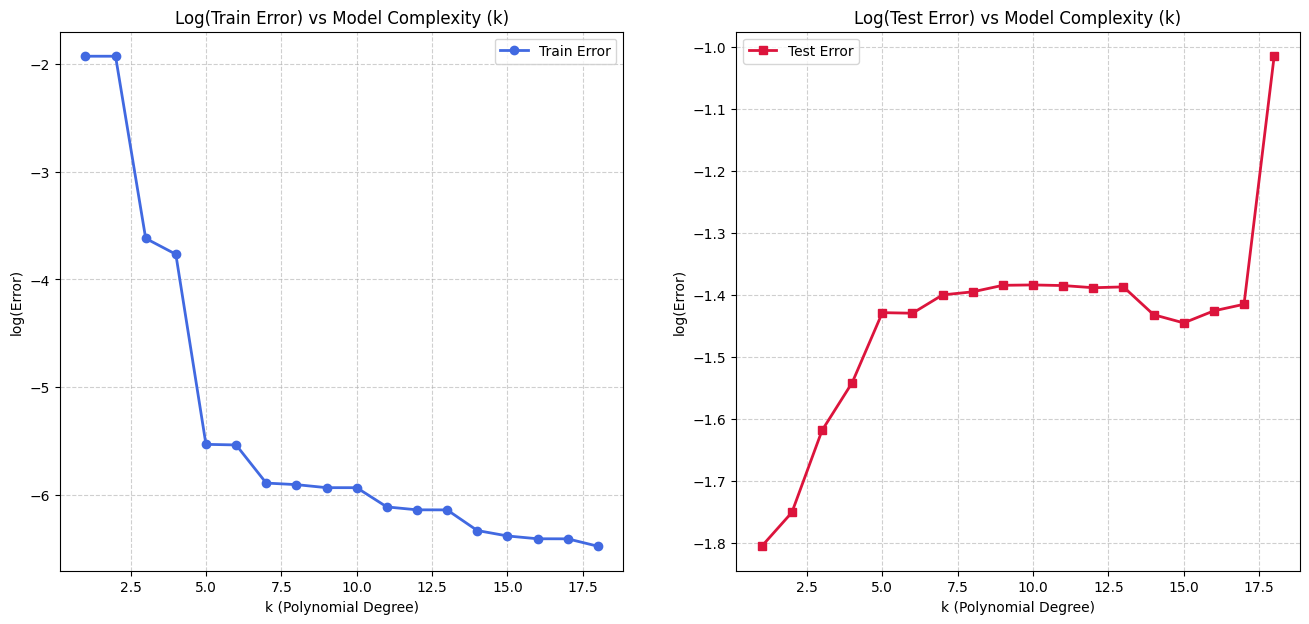

In [141]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(k, log_train_error, marker='o', color='royalblue', linewidth=2, label='Train Error')
plt.title('Log(Train Error) vs Model Complexity (k)')
plt.xlabel('k (Polynomial Degree)')
plt.ylabel('log(Error)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# --- Right plot: Test error ---
plt.subplot(1, 2, 2)
plt.plot(k, log_test_error, marker='s', color='crimson', linewidth=2, label='Test Error')
plt.title('Log(Test Error) vs Model Complexity (k)')
plt.xlabel('k (Polynomial Degree)')
plt.ylabel('log(Error)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

In [142]:
# the train and test curve can be slightly different based on the generated train and test data points
# so we generate the train and test datasets 100 times, repeat the above the experiment on each dataset
# and take the ln(avg(train/test error)) for each dimension across the 100 trials

global_test_errors, global_train_errors = [], []
train_samples=30
test_samples=1000
mean=0.0
scale=0.07
for i in range(100):
    X_train = np.random.uniform(0, 1, train_samples)
    Y_train = np.sin(2 * np.pi * X_train)**2 + np.random.normal(loc=mean, scale=scale, size=train_samples)
    X_train = X_train.reshape(-1, 1)
    
    # generate basis for the training dataset and get the weight vector
    basis = np.sin(np.pi*X_train)
    train_errors, test_errors, w = [], [], []
    for i in range(2, 20):
        Y_pred, weight=linear_regression(basis, Y_train)
        error_basis=np.mean((Y_pred-Y_train)**2)
        w.append(weight)
        train_errors.append(error_basis)
        basis=np.hstack([basis, np.sin(np.pi*i*X_train)])
    global_train_errors.append(train_errors)

    X_test = np.random.uniform(0, 1, test_samples).reshape(-1, 1)
    Y_test = np.sin(2 * np.pi * X_test)**2 + np.random.normal(loc=mean, scale=scale, size=test_samples)

    # generate the basis for the test dataset and get predictions
    basis = np.sin(np.pi*X_test)
    for i in range(2, 20):
        Y_test_pred = np.full(X_test.shape, w[i-2]) if i==2 else np.dot(w[i-2], basis.T)
        error_basis = np.mean((Y_test_pred-Y_test)**2)
        test_errors.append(error_basis)
        basis=np.hstack([basis, np.sin(np.pi*i*X_test)])
    global_test_errors.append(test_errors)


In [143]:
k = list(range(1, 19, 1))
train_mean_errors = np.mean(global_train_errors, axis=0)
test_mean_errors = np.mean(global_test_errors, axis=0)
log_train_mean_errors = [float(np.log(error)) for error in train_mean_errors]
log_test_mean_errors = [float(np.log(error)) for error in test_mean_errors]

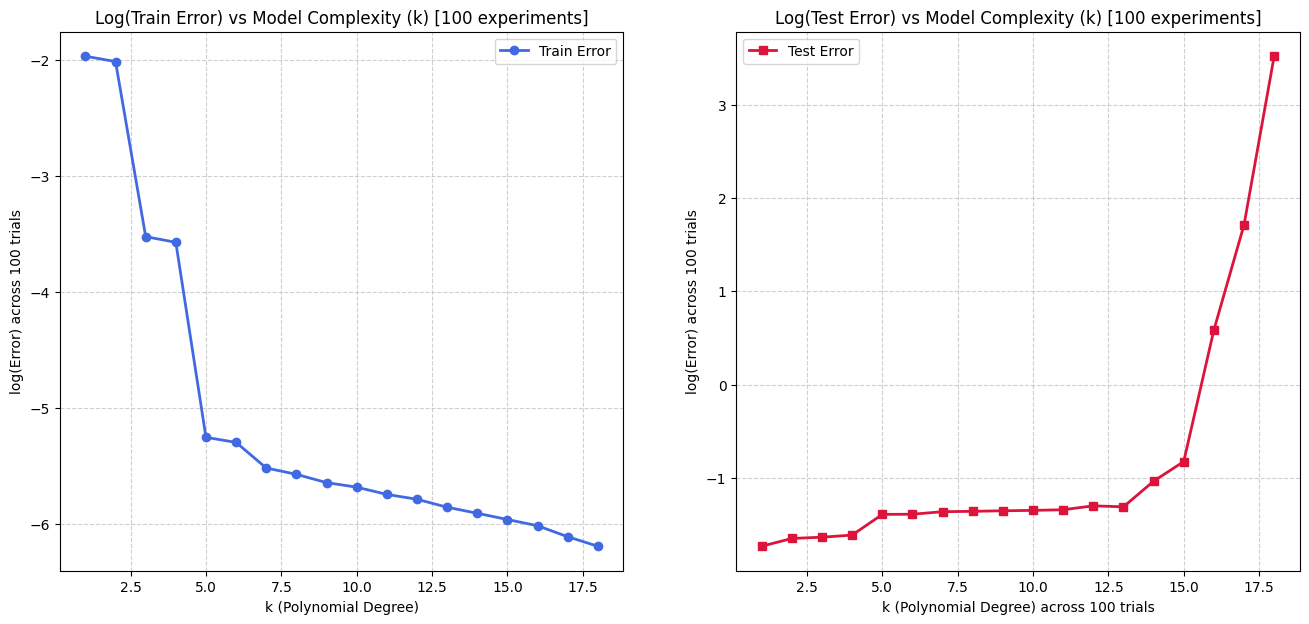

In [144]:
plt.figure(figsize=(16, 7))
plt.subplot(1, 2, 1)
plt.plot(k, log_train_mean_errors, marker='o', color='royalblue', linewidth=2, label='Train Error')
plt.title('Log(Train Error) vs Model Complexity (k) [100 experiments]')
plt.xlabel('k (Polynomial Degree)')
plt.ylabel('log(Error) across 100 trials')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

# --- Right plot: Test error ---
plt.subplot(1, 2, 2)
plt.plot(k, log_test_mean_errors, marker='s', color='crimson', linewidth=2, label='Test Error')
plt.title('Log(Test Error) vs Model Complexity (k) [100 experiments]')
plt.xlabel('k (Polynomial Degree) across 100 trials')
plt.ylabel('log(Error) across 100 trials')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()

## Q4 Solution

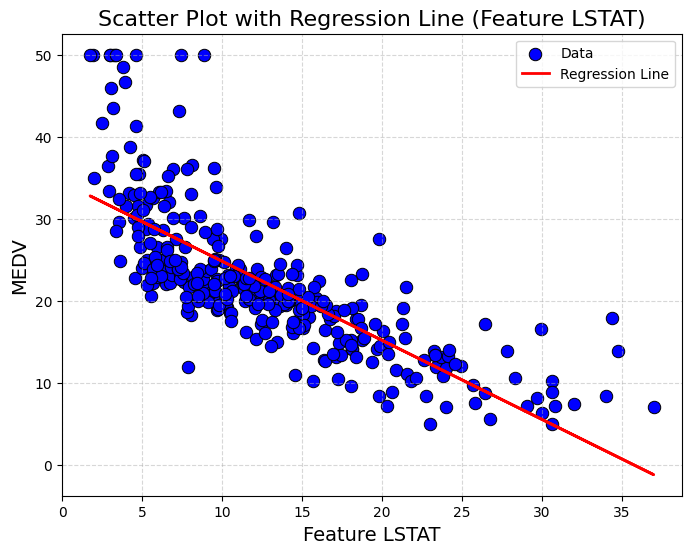

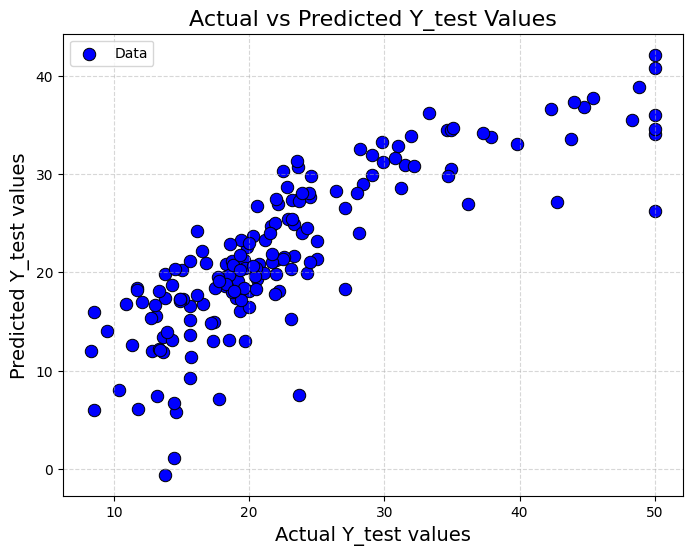

In [145]:
def generate_data(df: pd.DataFrame)->(pd.DataFrame, pd.DataFrame, pd.DataFrame, pd.DataFrame):
    split_index = int(len(df) * 2/3)
    reshuffled_df: pd.DataFrame = df.sample(frac=1)
    train_data, test_data = reshuffled_df[:split_index], reshuffled_df[split_index:]
    split_ratio = len(train_data)/len(df)
    #print(f"train-test split is: {split_ratio}")
    X_train, Y_train = train_data.iloc[:,:-1], train_data.iloc[:,-1:]
    X_test, Y_test = test_data.iloc[:,:-1], test_data.iloc[:,-1:]
    return X_train, X_test, Y_train, Y_test
    
def compute_least_squares_error(Y_train: np.array,
                                Y_test: np.array,
                                predicted_Y_train: np.array,
                                predicted_Y_test: np.array)->(float, float):
    # need to compute the standard deviation
    train_mse = np.mean((predicted_Y_train - np.array(Y_train).reshape(-1, 1))**2)
    test_mse = np.mean((predicted_Y_test - np.array(Y_test).reshape(-1, 1))**2)
    return float(np.round(train_mse, 3)), float(np.round(test_mse, 3))

def naive_linear_regression(Y_train: pd.DataFrame, Y_test: pd.DataFrame)->(np.array, np.array):
    X_train, X_test = np.ones((len(Y_train), 1)), np.ones((len(Y_test), 1))
    X_train_T = np.transpose(X_train)
    w = np.linalg.inv(X_train_T @ X_train) @ X_train_T @ Y_train
    return X_train @ w, X_test @ w

def linear_regression(X_train: pd.DataFrame, X_test: pd.DataFrame, Y_train: pd.DataFrame)->(np.array, np.array):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
    X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
    X_train_T = np.transpose(X_train)
    w = np.linalg.inv(X_train_T @ X_train) @ X_train_T @ Y_train
    return X_train @ w, X_test @ w, w

def plot_diagnostics(w, X_train, Y_train, feature_name):
      X_flat = X_train.flatten()
      Y_flat = np.array(Y_train).flatten()

      # Compute regression line using w
      Y_pred_line = w.iloc[0].values[0] * X_flat + w.iloc[1].values[0]  # slope * X + bias
            
      plt.figure(figsize=(8, 6))
      sns.scatterplot(x=X_flat, y=Y_flat, color='blue', s=80, edgecolor='k', label="Data")
      plt.plot(X_flat, Y_pred_line, color='red', linewidth=2, label="Regression Line")
      plt.title(f"Scatter Plot with Regression Line (Feature {feature_name})", fontsize=16)
      plt.xlabel(f"Feature {feature_name}", fontsize=14)
      plt.ylabel(f"{Y_train.columns[0]}", fontsize=14)
      plt.grid(True, linestyle='--', alpha=0.5)
      plt.legend()
      plt.show()

df = pd.read_csv('boston_filtered_data.csv')

algorithm_errors = {
    "naive_linear_regression": [[], []]
}

for trial_number in range(20):
    X_train, X_test, Y_train, Y_test = generate_data(df)
    predicted_Y_train, predicted_Y_test = naive_linear_regression(Y_train, Y_test)
    train_mse, test_mse = compute_least_squares_error(Y_train, Y_test, predicted_Y_train, predicted_Y_test)
    algorithm_errors["naive_linear_regression"][0].append(train_mse)
    algorithm_errors["naive_linear_regression"][1].append(test_mse)

    n_features = len(X_train.columns)
    for feature_number in range(n_features):
        X_train_feature = np.array(X_train.iloc[:, [feature_number]])
        X_test_feature = np.array(X_test.iloc[:, [feature_number]])
        predicted_Y_train, predicted_Y_test, w = linear_regression(X_train_feature, X_test_feature, Y_train)
        train_mse, test_mse = compute_least_squares_error(Y_train, Y_test, predicted_Y_train, predicted_Y_test)
        model_name = f"linear_regression_feature_{feature_number+1}"
        if model_name not in algorithm_errors:
            algorithm_errors[model_name] = [[], []]
        algorithm_errors[model_name][0].append(train_mse)
        algorithm_errors[model_name][1].append(test_mse)
        if trial_number == 0 and feature_number == 11:
            feature_name = X_train.columns[feature_number]
            plot_diagnostics(w, X_train_feature, Y_train, feature_name)

    predicted_Y_train, predicted_Y_test, w = linear_regression(X_train, X_test, Y_train)
    train_mse, test_mse = compute_least_squares_error(Y_train, Y_test, predicted_Y_train, predicted_Y_test)
    model_name = f"linear_regression_all_features"
    if model_name not in algorithm_errors:
        algorithm_errors[model_name] = [[], []]
    algorithm_errors[model_name][0].append(train_mse)
    algorithm_errors[model_name][1].append(test_mse)
    if trial_number == 0:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=Y_test.values.reshape(1, -1)[0], y=predicted_Y_test.values.reshape(1,-1)[0], color='blue', s=80, edgecolor='k', label="Data")
        plt.title("Actual vs Predicted Y_test Values", fontsize=16)
        plt.xlabel("Actual Y_test values", fontsize=14)
        plt.ylabel("Predicted Y_test values", fontsize=14)
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.legend()
        plt.show()    

In [146]:
mean_errors = {}
for k, v in algorithm_errors.items():
     mean_errors[k] = {
        "Train Error (mean ± std)": f"{np.mean(v[0]):.3f} ± {np.std(v[0]):.3f}",
        "Test Error (mean ± std)": f"{np.mean(v[1]):.3f} ± {np.std(v[1]):.3f}"
    }

In [147]:
errors = pd.DataFrame(mean_errors).T
errors.columns = ["train_error", "test_error"]

In [148]:
errors

,train_error,test_error
naive_linear_regression,83.616 ± 5.898,86.412 ± 11.817
linear_regression_feature_1,70.880 ± 5.769,74.241 ± 11.795
linear_regression_feature_2,72.262 ± 6.145,76.533 ± 12.459
linear_regression_feature_3,64.023 ± 5.917,66.373 ± 11.865
linear_regression_feature_4,80.796 ± 5.662,84.708 ± 11.351
linear_regression_feature_5,68.317 ± 6.022,70.882 ± 12.093
linear_regression_feature_6,44.378 ± 4.238,42.579 ± 8.342
linear_regression_feature_7,71.778 ± 6.509,74.310 ± 13.089
linear_regression_feature_8,78.300 ± 6.583,81.578 ± 13.235
linear_regression_feature_9,71.551 ± 6.099,73.771 ± 12.173
